<a href="https://colab.research.google.com/github/ratimayy/deep/blob/main/MLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Prepare the environment

In [ ]:
# List all NVIDIA GPUs as available in this computer (or Colab's session)
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import sys
print( f"Python {sys.version}\n" )

import numpy as np
print( f"NumPy {np.__version__}\n" )

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

Python 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]

NumPy 1.26.4

TensorFlow 2.17.0
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 0 GPU(s):


In [ ]:
# Set fixed seeding values for reproducability during experiments
# Skip this cell if random initialization (with varied results) is needed
np.random.seed(1234)
tf.random.set_seed(5678)

# 2. Prepare the data in NumPy

Suppose that this example deals with the single-label multi-class classification problem where a single input is a 1D vector of shape (100,) and there are 10 predefined classes of output.

1. Load train and test data
2. Data preprocessing
3. Format the data (e.g, shape, dtype) to suit with the model's requirement (i.e., MLP)

In [ ]:
input_dim = 100     # the number of features per one input
output_dim = 10     # the number of output classes

In [ ]:
# Load the train data
n_train = 10000
x_train = np.random.randn( n_train, input_dim )
y_train = np.random.randint( 0, output_dim, size=(n_train,) )

print( f"x_train.shape={x_train.shape} , x_train.dtype={x_train.dtype} , min(x_train)={np.min(x_train)} , max(x_train)={np.max(x_train)}" )
print( f"y_train.shape={y_train.shape} , y_train.dtype={y_train.dtype} , min(y_train)={np.min(y_train)} , max(y_train)={np.max(y_train)}" )

x_train.shape=(10000, 100) , x_train.dtype=float64 , min(x_train)=-4.750607746925718 , max(x_train)=5.029272727084725
y_train.shape=(10000,) , y_train.dtype=int64 , min(y_train)=0 , max(y_train)=9


In [ ]:
# Load the test data
n_test = 2000
x_test = np.random.randn( n_test, input_dim )
y_test = np.random.randint( 0, output_dim, size=(n_test,) )

print( f"x_test.shape={x_test.shape} , x_test.dtype={x_test.dtype} , min(x_test)={np.min(x_test)} , max(x_test)={np.max(x_test)}" )
print( f"y_test.shape={y_test.shape} , y_test.dtype={y_test.dtype} , min(y_test)={np.min(y_test)} , max(y_test)={np.max(y_test)}" )

x_test.shape=(2000, 100) , x_test.dtype=float64 , min(x_test)=-4.9507365019892084 , max(x_test)=5.053759567589386
y_test.shape=(2000,) , y_test.dtype=int64 , min(y_test)=0 , max(y_test)=9


In [ ]:
# Data preprocessing
pass

In [ ]:
# Data format: shape
# The dense layer of MLP expects the input of shape (n_samples, n_features)
pass

# Data format: data type
# Most DL frameworks use float32 as a default data type
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

print( f"x_train.shape={x_train.shape} , x_train.dtype={x_train.dtype} , min(x_train)={np.min(x_train)} , max(x_train)={np.max(x_train)}" )
print( f"x_test.shape={x_test.shape} , x_test.dtype={x_test.dtype} , min(x_test)={np.min(x_test)} , max(x_test)={np.max(x_test)}" )

x_train.shape=(10000, 100) , x_train.dtype=float32 , min(x_train)=-4.750607967376709 , max(x_train)=5.029272556304932
x_test.shape=(2000, 100) , x_test.dtype=float32 , min(x_test)=-4.9507365226745605 , max(x_test)=5.053759574890137


# 3. Create the network architecture

In [ ]:
model = tf.keras.models.Sequential() #ค่อยๆใส่ layer ตามลำดับ เหมือนไม้เสียบลูกชิ้น

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

#input_dim คือจน feature, ไม่ต้องกำำหนด batch size

# Hidden layer, ตัวเลขก็มั่วขึ้นมา แต่อยากรู้เลขก็ต้องไปอ่านวิจัยที่คนอื่นเคยทำไว้
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                      │ (None, 32)                  │           3,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden2 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,754 (30.29 KB)

 Trainable params: 7,754 (30.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.weights #ตอนนี้เป็น random weight

[<KerasVariable shape=(100, 32), dtype=float32, path=sequential/hidden1/kernel>,
 <KerasVariable shape=(32,), dtype=float32, path=sequential/hidden1/bias>,
 <KerasVariable shape=(32, 64), dtype=float32, path=sequential/hidden2/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential/hidden2/bias>,
 <KerasVariable shape=(64, 32), dtype=float32, path=sequential/hidden3/kernel>,
 <KerasVariable shape=(32,), dtype=float32, path=sequential/hidden3/bias>,
 <KerasVariable shape=(32, 10), dtype=float32, path=sequential/output/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential/output/bias>]

# 4. Compile the model

Examples of compiling the model

4.1 คือแบบสั้น
4.2 คือแบบยาว

In [ ]:
# Compile with default values for both optimizer and loss #ต้องระบุ optimizer and loss (loss='sparse_categorical_crossentropy' เป็นตัวที่เขาศึกษามาแล้ว)
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'] )  #metrics=['acc'] เป็นตัวกำหนด model สำหรับการ evaluate

In [ ]:
# Compile with hyperparameter tuning, การเทรนจะคืบหน้าหรือไม่ ขึ้นกับ learning rate
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) ,
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
               metrics=['acc']
             )

# 5. Train the model on train set


- เป็นการ train แบบ keras เลยสั้นหน่อย
- y คือ output
- ถ้า verbose=1 คือไม่ print result อะไรออกมาเลย
- แบบนี้คือ เอา train data ขึ้น GPU ทั้งหมด
- model.fit เป็นตัวเก็บ result ของ epoc สุดท้าย ซึ่งส่วนใหญ่เป็นผลลัพธ์ที่ดีที่สุด


In [ ]:
history = model.fit ( x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2 )

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - acc: 0.0990 - loss: 2.3429 - val_acc: 0.0995 - val_loss: 2.3143
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.1276 - loss: 2.2922 - val_acc: 0.0955 - val_loss: 2.3158
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.1416 - loss: 2.2784 - val_acc: 0.0955 - val_loss: 2.3181
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.1538 - loss: 2.2652 - val_acc: 0.0950 - val_loss: 2.3216
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.1687 - loss: 2.2518 - val_acc: 0.0940 - val_loss: 2.3263
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.1762 - loss: 2.2374 - val_acc: 0.0890 - val_loss: 2.3316
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.1846 - loss: 2.2217 - val_acc: 0.0900 - val_loss: 2.3394
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.1928 - loss: 2.2053 - val_acc: 0.0925 - val_loss: 2.3475
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2047 - loss:

In [ ]:
# Check the keys in 'history'
history.history.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

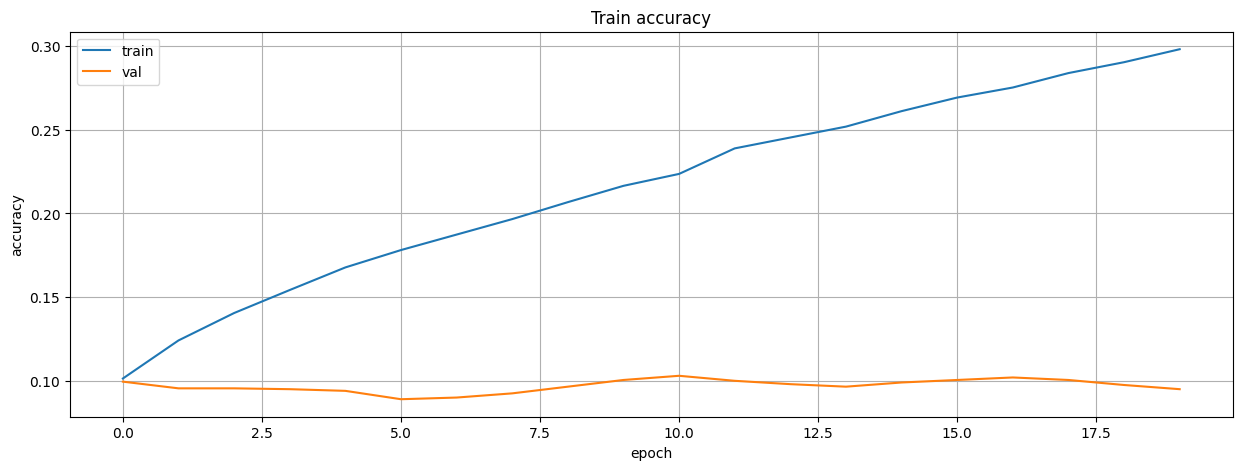

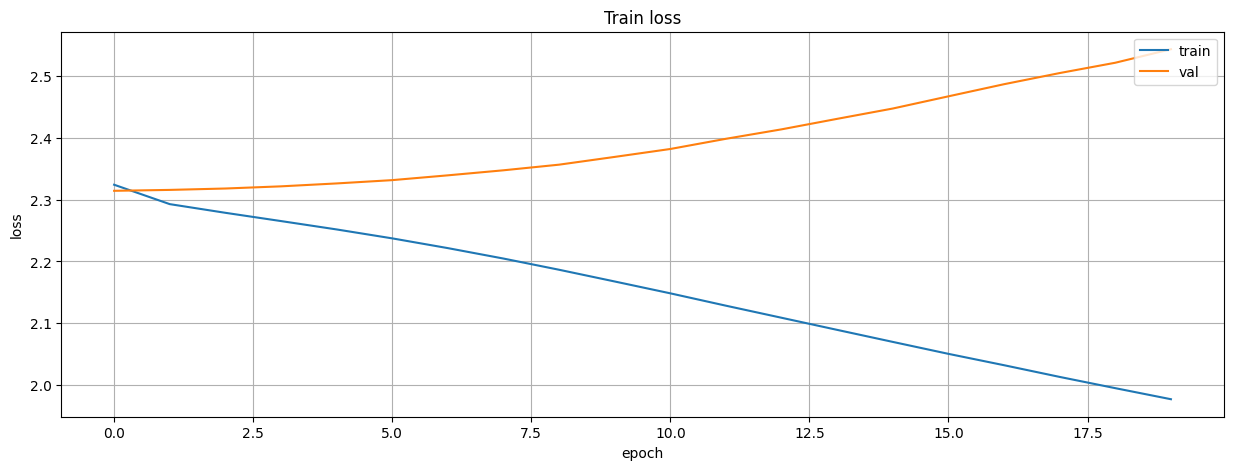

In [ ]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

# 6. Evaluate the model on test set

In [ ]:
results = model.evaluate(x_test, y_test, batch_size=128)
print( f"{model.metrics_names} = {results}" )

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.1007 - loss: 2.5613 
['loss', 'compile_metrics'] = [2.5667483806610107, 0.10199999809265137]


# 7. Inference

In [ ]:
# Test using the model on x_test[i]
i = 0
y_pred = model.predict( x_test[i].reshape(1,-1) )   # Reshape x_test[i] from (n_feature,) to (1, n_feature)

print( f"{'#'*10} Input: x_test[{i}] {'#'*10}" )
print( f"shape={x_test[i].shape}\nvalue={x_test[i]}\n" )

print( f"{'#'*10} Ground truth: y_test[{i}] {'#'*10}" )
print( f"shape={y_test[i].shape}\nvalue={y_test[i]}\n" )

print( f"{'#'*10} Prediction: y_pred {'#'*10}" )
print( f"type={type(y_pred)}\ndtype={y_pred.dtype}\nshape={y_pred.shape}" )
print( f"value={y_pred}" )
print( f"np.argmax(y_pred)={np.argmax(y_pred)}" )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
########## Input: x_test[0] ##########
shape=(100,)
value=[ 5.10549903e-01 -1.83352447e+00 -1.49723217e-01  1.11129284e+00
  1.42249716e-02 -5.62348604e-01  9.51292276e-01 -6.17010534e-01
 -3.60237151e-01 -1.38861024e+00  4.92188305e-01  1.01176178e+00
  1.80850446e+00  5.89353263e-01  1.36130667e+00 -5.62302768e-03
 -7.39900172e-01  2.56012976e-02  2.96016812e-01  1.08451247e+00
 -1.32617605e+00 -2.80883074e-01 -1.16435957e+00 -5.38934112e-01
 -2.56118089e-01 -1.22306556e-01 -3.43174607e-01 -6.91529632e-01
  7.18301907e-02 -1.80278540e+00 -1.04563855e-01  1.32607853e+00
  9.78216887e-01 -1.11498392e+00 -5.67678213e-01 -1.33293435e-01
  1.21934079e-01  4.03834641e-01 -9.09104645e-01 -1.77769288e-01
 -3.14136744e-01 -4.53699589e-01  1.23750997e+00  3.33860934e-01
 -3.71486664e-01  5.12168765e-01 -1.69686899e-01  2.44636559e+00
  1.00375104e+00  1.39884210e+00 -8.26856732e-01  6.08823121e-01
 -1.26637721e+00  1.69943726e+00  1.27452350e+00 -1.6371628

argmax(y_pred) บอกตัวที่ค่าสูงสุด